<a href="https://www.kaggle.com/code/arjukundu/microsoft-stocks-using-time-series-lgbm-regressor?scriptVersionId=145736148" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/microsoft-stocks-from-1986-to-2023/Microsoft Stocks.csv


In [2]:
import pandas as pd 
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
#outputdata
data= pd.read_csv("/kaggle/input/microsoft-stocks-from-1986-to-2023/Microsoft Stocks.csv")
data.sample(5)

,Date,Price,Open,High,Low,Volume
5893,12/13/1999,48.31,46.80,48.47,46.38,52690000
1626,11/25/2016,60.53,60.30,60.53,60.13,8410000
3248,06/21/2010,25.95,26.78,26.89,25.89,54630000
4194,09/15/2006,26.85,26.58,26.94,26.49,126130000
6514,06/26/1997,16.03,16.27,16.35,15.98,37210000


In [4]:
data.max()

Date      12/31/2021
Price         343.11
Open          344.62
High          349.67
Low            342.2
Volume     788690000
dtype: object

In [5]:
data.min()

Date      01/02/1987
Price           0.09
Open            0.09
High            0.09
Low             0.09
Volume       2300000
dtype: object

In [6]:
data.cummin()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,309.10,309.90,306.60,16290000
2,05/11/2023,308.97,309.10,309.90,306.26,16290000
3,05/10/2023,308.97,308.62,309.90,306.26,16290000
4,05/09/2023,307.00,308.00,309.90,306.26,16290000
...,...,...,...,...,...,...
9364,01/02/1987,0.09,0.09,0.09,0.09,2300000
9365,01/02/1987,0.09,0.09,0.09,0.09,2300000
9366,01/02/1987,0.09,0.09,0.09,0.09,2300000
9367,01/02/1987,0.09,0.09,0.09,0.09,2300000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9369 non-null   object 
 1   Price   9369 non-null   float64
 2   Open    9369 non-null   float64
 3   High    9369 non-null   float64
 4   Low     9369 non-null   float64
 5   Volume  9369 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 439.3+ KB


In [8]:
data.head()

,Date,Price,Open,High,Low,Volume
0,05/15/2023,309.46,309.10,309.90,307.59,16290000
1,05/12/2023,308.97,310.55,310.65,306.60,19770000
2,05/11/2023,310.11,310.10,311.12,306.26,31680000
3,05/10/2023,312.31,308.62,313.00,307.67,30080000
4,05/09/2023,307.00,308.00,310.04,306.31,21340000


In [9]:
data.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
dtype: int64

In [10]:
data.corr()


,Price,Open,High,Low,Volume
Price,1.000000,0.999840,0.999920,0.999924,-0.332175
Open,0.999840,1.000000,0.999932,0.999925,-0.332017
High,0.999920,0.999932,1.000000,0.999900,-0.330554
Low,0.999924,0.999925,0.999900,1.000000,-0.333616
Volume,-0.332175,-0.332017,-0.330554,-0.333616,1.000000


In [11]:
# Converting the Date column data type from object to datetime
data['Date'] = pd.to_datetime(data['Date'], errors = 'ignore', dayfirst = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9369 entries, 0 to 9368
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9369 non-null   datetime64[ns]
 1   Price   9369 non-null   float64       
 2   Open    9369 non-null   float64       
 3   High    9369 non-null   float64       
 4   Low     9369 non-null   float64       
 5   Volume  9369 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 439.3 KB


## Data Visualization

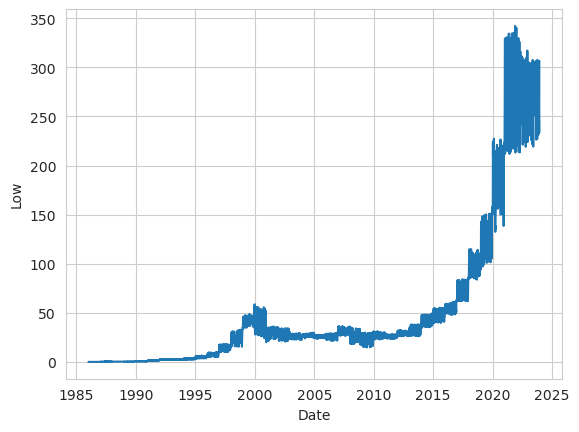

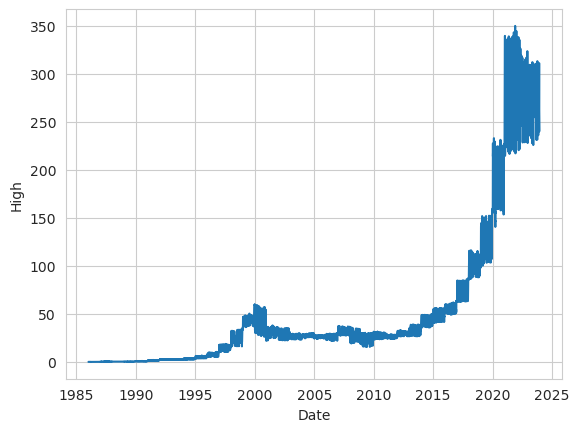

In [12]:
sns.lineplot(x = 'Date', y = 'Low', data = data)
plt.show()
sns.lineplot(x = 'Date', y = 'High', data = data)
plt.show()

<Axes: >

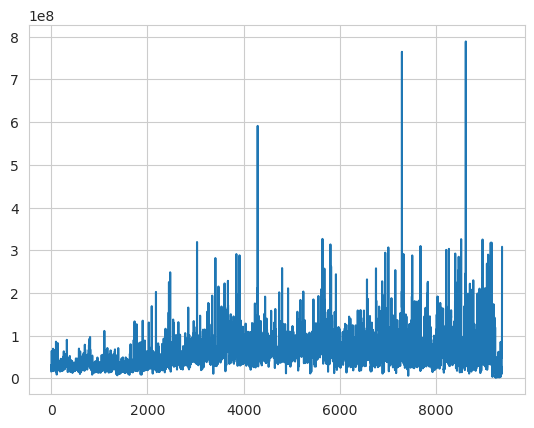

In [13]:
data['Volume'].plot()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

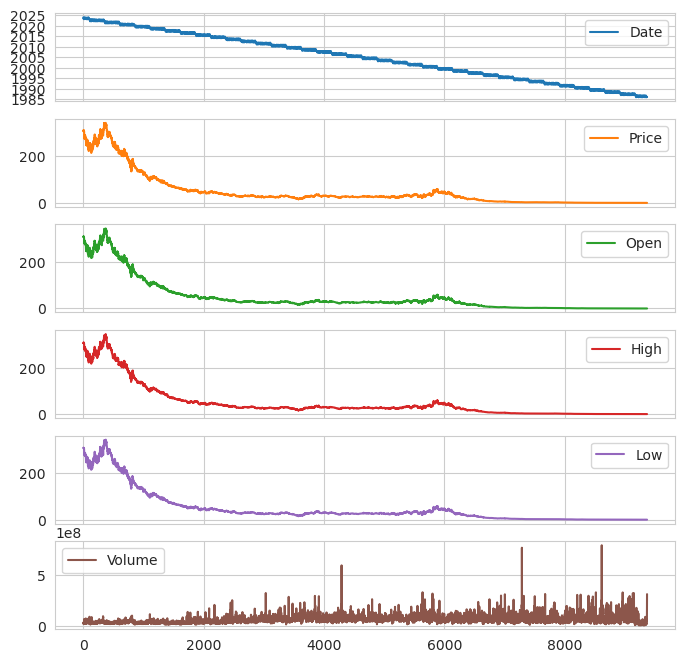

In [14]:
data.plot(subplots=True, figsize=(8, 8))


<Axes: >

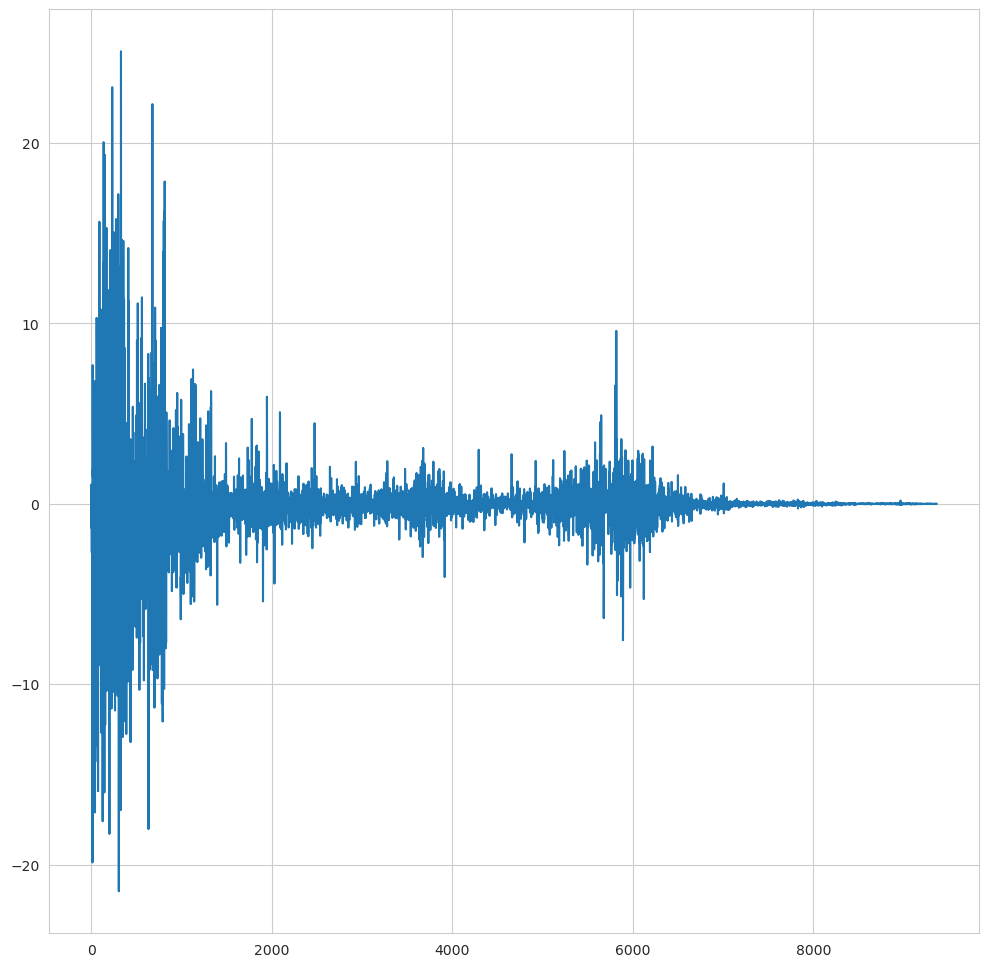

In [15]:
data.Low.diff(2).plot(figsize=(12,12))


<Axes: >

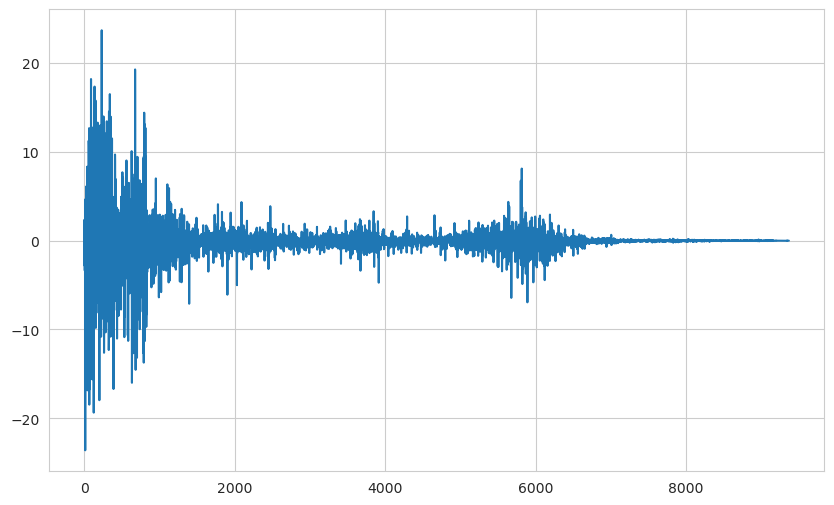

In [16]:
data.High.diff(2).plot(figsize=(10, 6))


<Axes: >

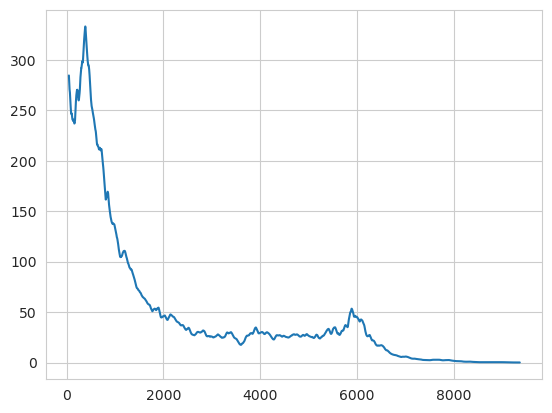

In [17]:
window_size = 50
rolling_mean = data['Open'].rolling\
                (window_size).mean()
rolling_mean.plot()

In [18]:
px.line(data, x = 'Date', y = 'Low', title = 'Stock Performance for Microsoft')


In [19]:
fig=px.bar(data, x = 'Date', y = 'Low', title = 'Stock Performance for Microsoft',color='Price')
fig.update_traces(marker_color = 'green', marker_line_color = 'black',
                  marker_line_width = 2, opacity = 1)
fig.show()

In [20]:
fig = px.line(data, x='Date', y='High', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()


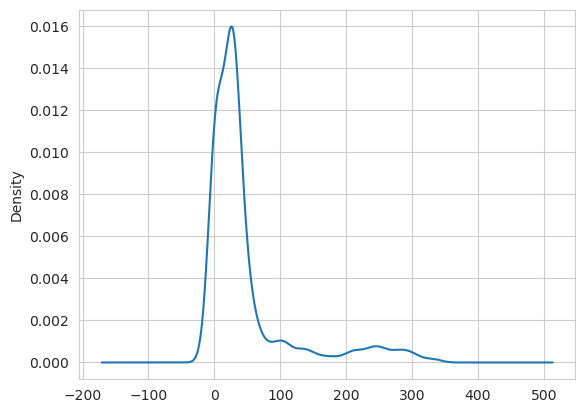

In [21]:
df_close = data['Low']
df_close.plot(kind='kde');

In [22]:
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime



In [23]:
data['MA10'] = data['Low'].rolling(window = 10).mean().reset_index(0, drop = True)
data['MA20'] = data['Low'].rolling(window = 20).mean().reset_index(0, drop = True)

In [24]:
data.corr()


,Price,Open,High,Low,Volume,MA10,MA20
Price,1.000000,0.999840,0.999920,0.999924,-0.332175,0.999424,0.998809
Open,0.999840,1.000000,0.999932,0.999925,-0.332017,0.999335,0.998715
High,0.999920,0.999932,1.000000,0.999900,-0.330554,0.999372,0.998759
Low,0.999924,0.999925,0.999900,1.000000,-0.333616,0.999414,0.998798
Volume,-0.332175,-0.332017,-0.330554,-0.333616,1.000000,-0.332511,-0.332793
MA10,0.999424,0.999335,0.999372,0.999414,-0.332511,1.000000,0.999675
MA20,0.998809,0.998715,0.998759,0.998798,-0.332793,0.999675,1.000000


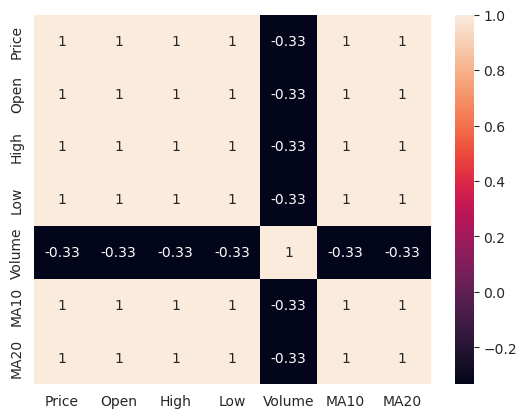

In [25]:
sns.heatmap(data.corr(), annot = True)
plt.show()

In [26]:
# Plotting the Close, MA10, MA20 using the line chart
px.line(data, x = 'Date', y = ['Low', 'MA10', 'MA20'], title = 'Moving Averages for Stock Microsoft')

In [27]:
data.sample(10)

,Date,Price,Open,High,Low,Volume,MA10,MA20
9171,1986-12-23,0.17,0.17,0.17,0.17,23790000,0.167,0.1860
348,2021-12-23,334.69,332.75,336.39,332.73,19620000,330.620,317.8445
4063,2007-03-27,27.72,28.04,28.16,27.65,58980000,27.816,28.0820
6525,1997-11-06,15.88,15.60,15.92,15.45,49060000,15.978,15.9530
6678,1996-10-31,8.58,8.52,8.59,8.51,37030000,8.756,9.0685
7129,1995-01-20,3.85,3.93,3.97,3.83,82390000,3.742,3.7685
5704,2000-12-09,34.06,34.38,34.66,33.81,46780000,31.874,30.2305
5416,2001-07-11,32.12,32.11,32.52,32.02,58910000,32.440,32.1735
2587,2013-05-02,27.50,27.62,27.66,27.36,35410000,27.570,27.5700
9161,1987-08-01,0.19,0.19,0.20,0.19,61490000,0.205,0.2215


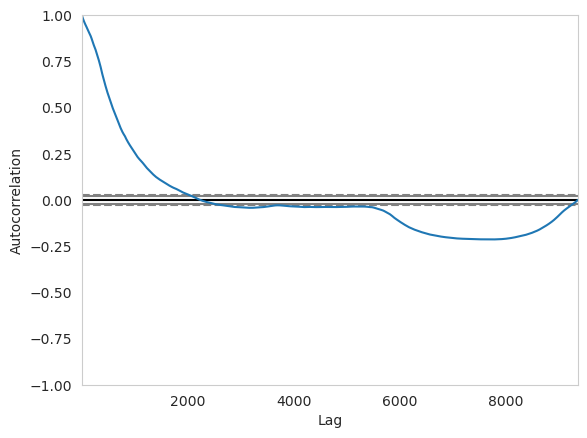

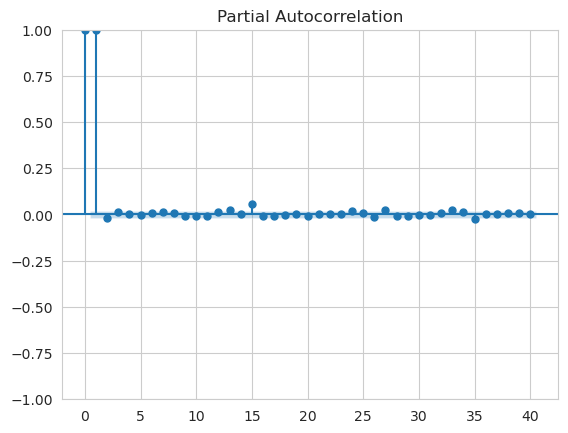

In [28]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
autocorrelation_plot(data['Low'])
plot_pacf(data['Low'])
plt.show()

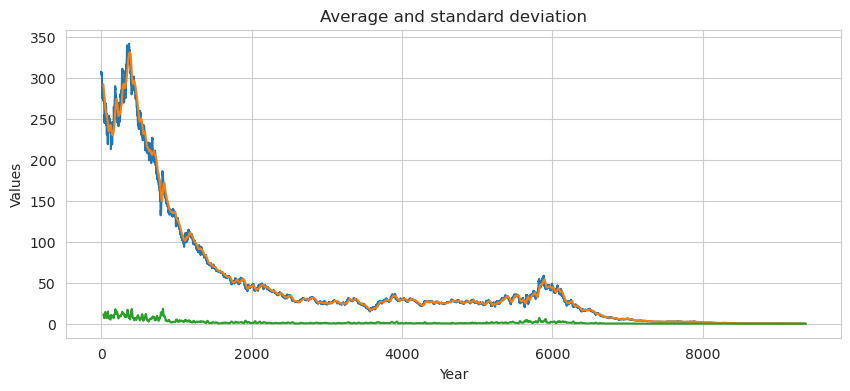

In [29]:
mean = data['Low'].rolling(window = 30).mean()
std = data['Low'].rolling(window = 30).std()

plt.figure(figsize = (10, 4))

plt.plot(data['Low'])
plt.plot(mean)
plt.plot(std)

plt.title('Average and standard deviation')
plt.xlabel('Year')
plt.ylabel('Values')

plt.show()

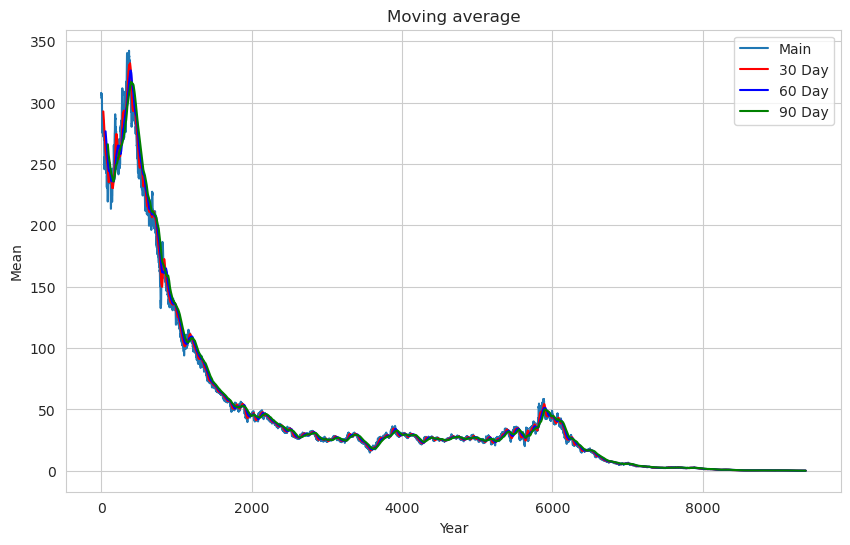

In [30]:
mean1 = data['Low'].rolling(window = 30).mean()
mean2 = data['Low'].rolling(window = 60).mean()
mean3 = data['Low'].rolling(window = 90).mean()

plt.figure(figsize = (10, 6))

plt.plot(data['Low'])
plt.plot(mean1, color = 'r')
plt.plot(mean2, color = 'b')
plt.plot(mean3, color = 'g')
plt.legend(['Main', '30 Day', '60 Day', '90 Day'])

plt.title('Moving average')
plt.xlabel('Year')
plt.ylabel('Mean')

plt.show()

In [31]:
data['daily return'] = (data['Open'] - data['Low']/ data['Open']) * 100
print(data.head)

<bound method NDFrame.head of            Date   Price    Open    High     Low     Volume   MA10    MA20  \
0    2023-05-15  309.46  309.10  309.90  307.59   16290000    NaN     NaN   
1    2023-12-05  308.97  310.55  310.65  306.60   19770000    NaN     NaN   
2    2023-11-05  310.11  310.10  311.12  306.26   31680000    NaN     NaN   
3    2023-10-05  312.31  308.62  313.00  307.67   30080000    NaN     NaN   
4    2023-09-05  307.00  308.00  310.04  306.31   21340000    NaN     NaN   
...         ...     ...     ...     ...     ...        ...    ...     ...   
9364 1986-03-20    0.10    0.10    0.10    0.09   58440000  0.091  0.0945   
9365 1986-03-19    0.10    0.10    0.10    0.10   47890000  0.091  0.0945   
9366 1986-03-18    0.10    0.10    0.10    0.10   66470000  0.092  0.0945   
9367 1986-03-17    0.10    0.10    0.10    0.10  133169999  0.093  0.0945   
9368 1986-03-14    0.10    0.10    0.10    0.10  308160000  0.094  0.0945   

      daily return  
0     30810.488515  
1  

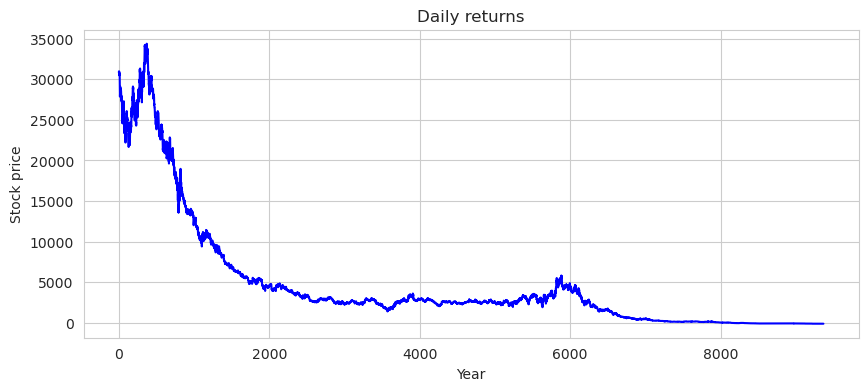

In [32]:
plt.figure(figsize = (10, 4))

plt.plot(data['daily return'], color = 'b')

plt.title('Daily returns')
plt.xlabel('Year')
plt.ylabel('Stock price')

plt.show()

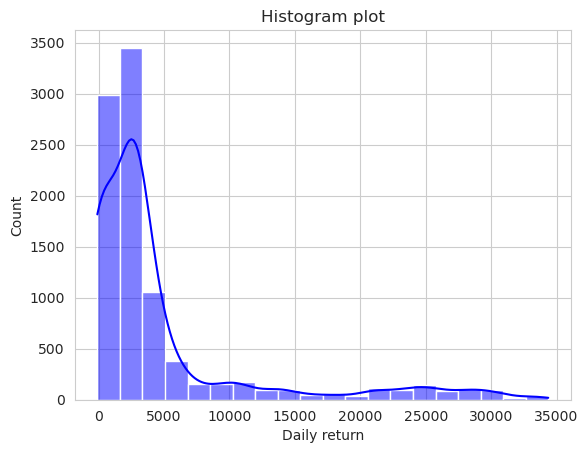

In [33]:
sns.histplot(data['daily return'], color = 'b', bins = 20, kde = True)
plt.xlabel('Daily return')
plt.title('Histogram plot')
plt.show()

<Axes: xlabel='Date', ylabel='Open'>

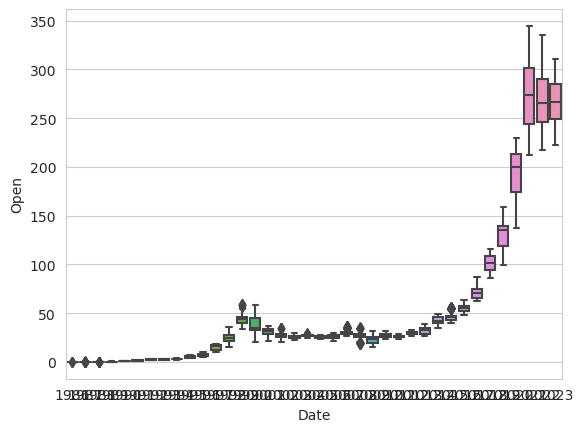

In [34]:

 
data["Date"] = data["Date"].dt.year
 
sns.boxplot(data=data, x="Date", y="Open")

## Data Preprocessing

In [35]:
def outliers(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1
            print("Number of outliers present in ",i,"column: ",data[(data[i] < (q1 - 1.5 * iqr)) | (data[i] > (q3 + 1.5 * iqr))][i].count())
outliers(data)

Number of outliers present in  Date column:  0
Number of outliers present in  Price column:  1232
Number of outliers present in  Open column:  1228
Number of outliers present in  High column:  1226
Number of outliers present in  Low column:  1228
Number of outliers present in  Volume column:  363
Number of outliers present in  MA10 column:  1217
Number of outliers present in  MA20 column:  1212
Number of outliers present in  daily return column:  1228


In [36]:
def remove_outliers(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            q1 = data[i].quantile(0.25)
            q3 = data[i].quantile(0.75)
            iqr = q3 - q1
            data = data[(data[i] > (q1 - 1.5 * iqr)) & (data[i] < (q3 + 1.5 * iqr))]
    return data
data = remove_outliers(data)

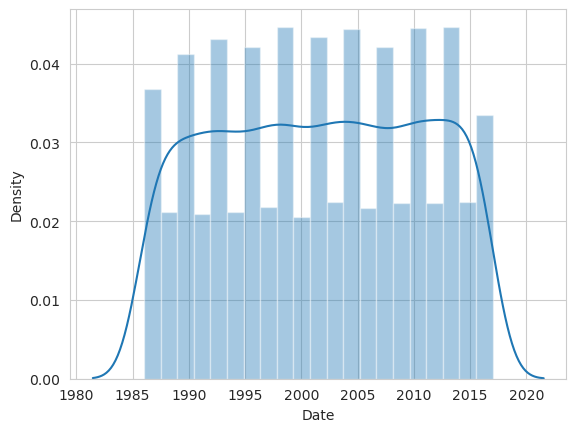

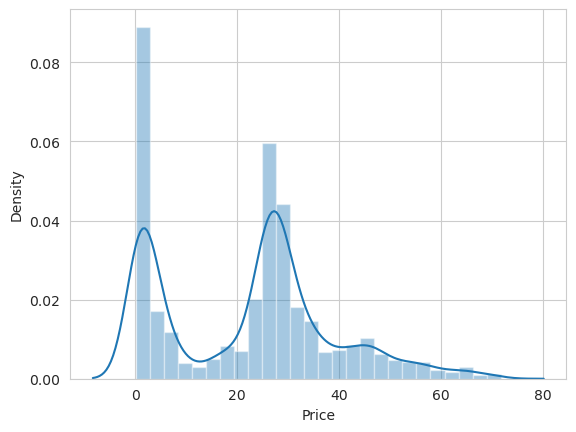

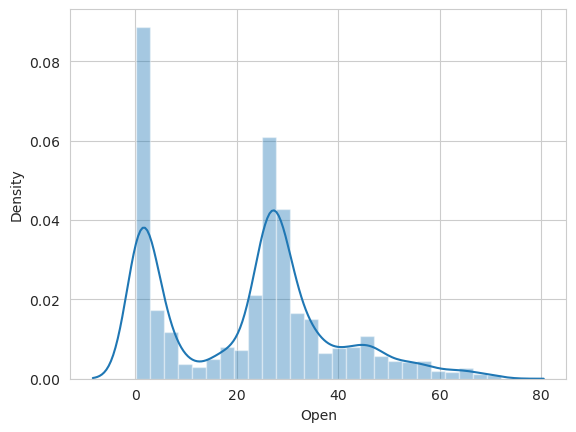

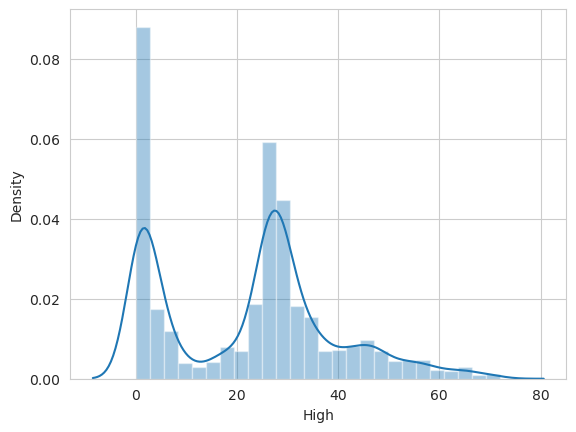

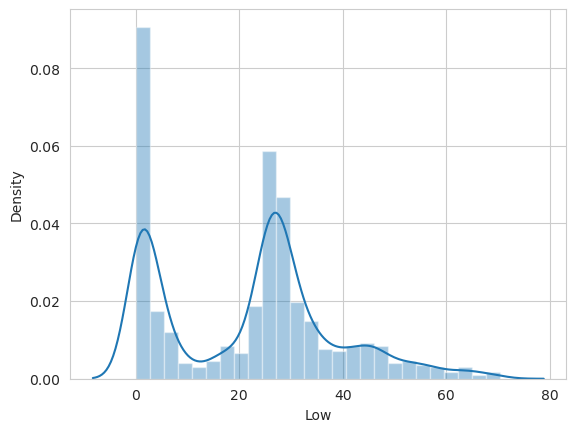

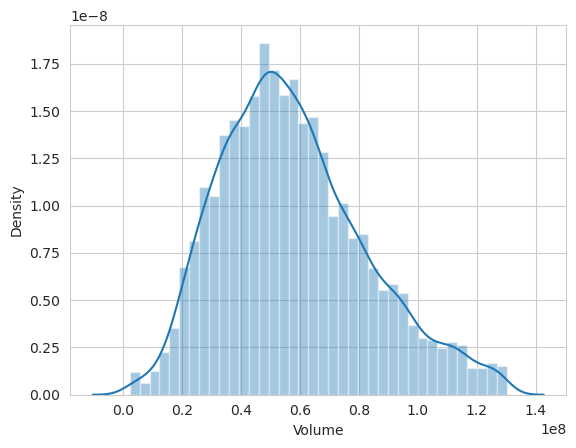

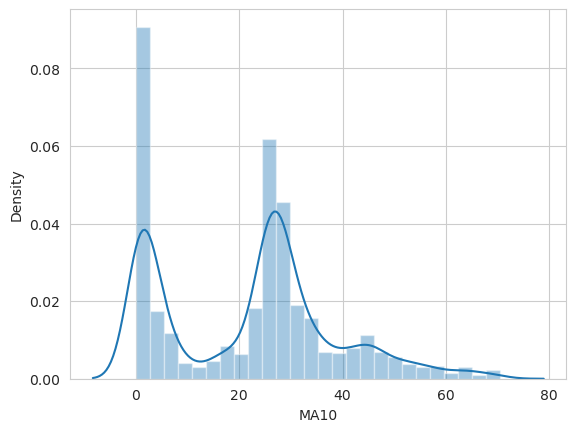

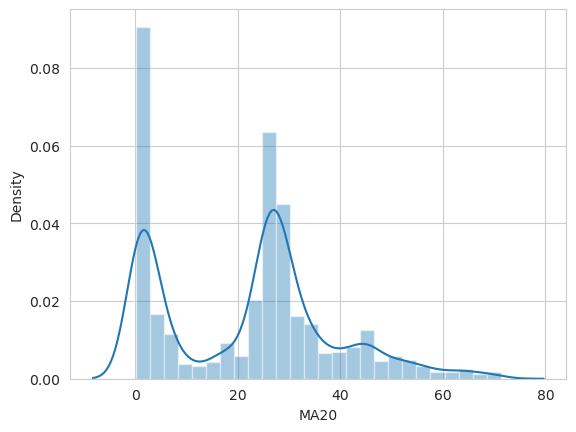

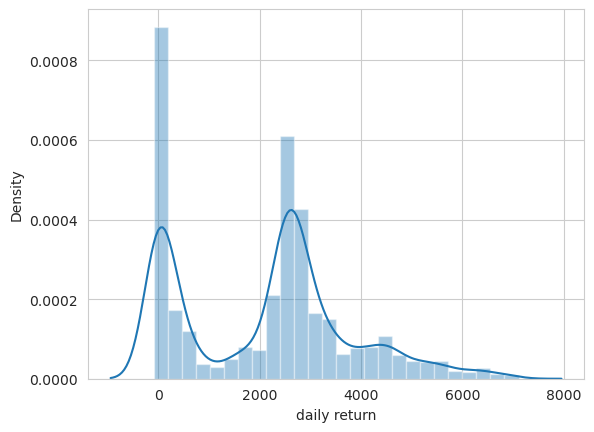

In [37]:
def skewness(data):
    for i in data.columns:
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':
            sns.distplot(data[i])
            plt.show()
skewness(data)

In [38]:
data.cov()


,Date,Price,Open,High,Low,Volume,MA10,MA20,daily return
Date,8.142230e+01,1.288645e+02,1.287965e+02,1.298158e+02,1.278112e+02,-4.729951e+07,1.280559e+02,1.283468e+02,1.287719e+04
Price,1.288645e+02,2.837787e+02,2.836424e+02,2.864217e+02,2.808537e+02,-9.466070e+07,2.808829e+02,2.809645e+02,2.836107e+04
Open,1.287965e+02,2.836424e+02,2.836668e+02,2.863665e+02,2.807973e+02,-9.470179e+07,2.807687e+02,2.808471e+02,2.836375e+04
High,1.298158e+02,2.864217e+02,2.863665e+02,2.891718e+02,2.834913e+02,-9.372320e+07,2.834931e+02,2.835696e+02,2.863362e+04
Low,1.278112e+02,2.808537e+02,2.807973e+02,2.834913e+02,2.780362e+02,-9.540889e+07,2.780219e+02,2.781068e+02,2.807660e+04
Volume,-4.729951e+07,-9.466070e+07,-9.470179e+07,-9.372320e+07,-9.540889e+07,6.173996e+14,-9.561001e+07,-9.624464e+07,-9.461447e+09
MA10,1.280559e+02,2.808829e+02,2.807687e+02,2.834931e+02,2.780219e+02,-9.561001e+07,2.786897e+02,2.789753e+02,2.807369e+04
MA20,1.283468e+02,2.809645e+02,2.808471e+02,2.835696e+02,2.781068e+02,-9.624464e+07,2.789753e+02,2.796688e+02,2.808153e+04
daily return,1.287719e+04,2.836107e+04,2.836375e+04,2.863362e+04,2.807660e+04,-9.461447e+09,2.807369e+04,2.808153e+04,2.836083e+06


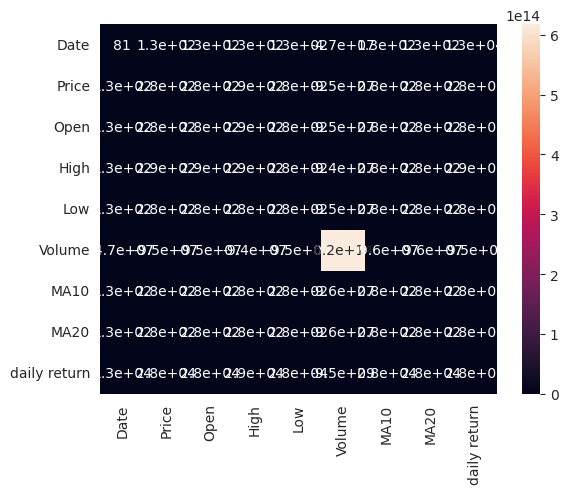

In [39]:
sns.heatmap(data.cov(), annot = True)
plt.show()

In [40]:
# Apply log transformation to reduce the skewness
data['Open'] = np.log(data['Open'])
data['High'] = np.log(data['High'])
data['Low'] = np.log(data['Low'])
data['Volume'] = np.log(data['Volume'])
data['Price'] = np.log(data['Price'])

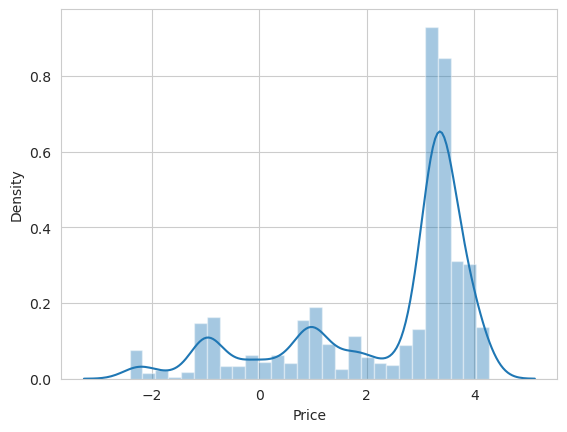

In [41]:
# check for skewness for price column only
sns.distplot(data['Price'])
plt.show()


In [42]:
X = data.drop(columns = ['Price','Date'])
y = data['Price']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6028, 7) (1508, 7) (6028,) (1508,)


In [44]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
robust_df = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [46]:
y_pred = lr.predict(X_test)
y_pred

array([3.23261381, 3.7514912 , 0.42558291, ..., 2.9589637 , 3.20245899,
       3.28650262])

In [47]:
lr.score(X_test, y_test)

0.9999634934842198

## LGBM Regressor with Repeated stratified K fold¶


In [48]:
from sklearn.model_selection import TimeSeriesSplit

In [49]:
tscv = TimeSeriesSplit(n_splits=3)
tscv.split(X,y)

<generator object TimeSeriesSplit.split at 0x7d08c484d700>

In [50]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [51]:
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

from numpy import mean
from numpy import std
print('Negative MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Negative MAE: -0.008 (0.000)


In [52]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
print("The Mean Absolute error is: ", mean_absolute_error(y_test, y_pred))

The Mean Absolute error is:  0.00816479451105016


In [53]:
model.score(X_test, y_test)

0.9999393555119036

In [54]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
4803,3.225255,3.230747
5983,3.758406,3.754905
8007,0.425268,0.430353
5414,3.484312,3.473411
9250,-2.302585,-2.303757
...,...,...
1870,4.006969,4.008437
8329,-0.210721,-0.207092
3629,2.963209,2.967821
2954,3.205588,3.202007
